In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, shapiro, uniform
import seaborn as sns

Часть 1.

1. Анализ данных о весе новорожденных (1960-1967 года, Сан-Франциско, источник: https://www.kaggle.com/datasets/debjeetdas/babies-birth-weight?resource=download)

Чтение данных из файла csv

In [57]:
file_path = "C:/Users/bonda/OneDrive/Документы/Магистратура МАИ+СБЕР/Теор. вер. и мат. статистика/ЛР1/babies.csv"
data = pd.read_csv(file_path)

# Извлечение столбца с весом новорожденных
weights = data["weight"].dropna()  # Убираем пропуски

Визуализация распределения

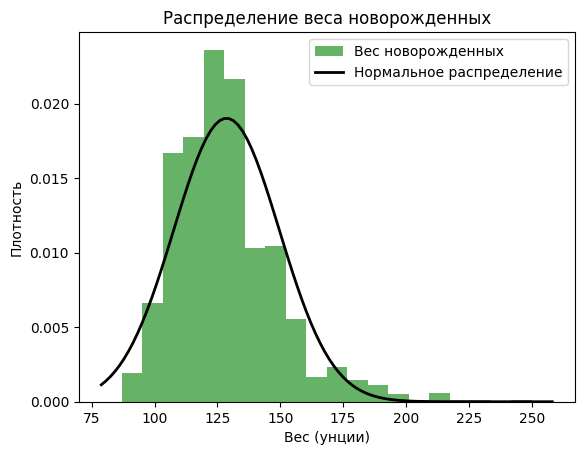

In [58]:
# Построение гистограммы
plt.hist(weights, bins=20, density=True, alpha=0.6, color="g", label="Вес новорожденных")

# Оценка параметров нормального распределения
mu, std = weights.mean(), weights.std()

# Создание кривой нормального распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Наложение кривой нормального распределения
plt.plot(x, p, "k", linewidth=2, label="Нормальное распределение")

# Оформление графика
plt.title("Распределение веса новорожденных")
plt.xlabel("Вес (унции)")
plt.ylabel("Плотность")
plt.legend()
plt.show()

Оценка смещения медианы

In [59]:
mean_weight = weights.mean()
median_weight = weights.median()
range_weight = weights.max() - weights.min()  # Размах

threshold = 0.15 * range_weight  # 15% от размаха
diff = abs(mean_weight - median_weight)  # Модуль разницы между средним и медианой

print(f"Среднее значение веса: {mean_weight}")
print(f"Медиана веса: {median_weight}")
print(f"Размах: {range_weight}")
print(f"Разница между средним и медианой: {diff}")
print(f"Пороговое значение для смещённой медианы (15% размаха): {threshold}")

if diff >= threshold:
    print("Распределение имеет смещённую медиану относительно среднего на ~15% размаха.")
else:
    print("Распределение не имеет значительного смещения медианы относительно среднего.")

Среднее значение веса: 128.62583333333333
Медиана веса: 125.0
Размах: 163.0
Разница между средним и медианой: 3.6258333333333326
Пороговое значение для смещённой медианы (15% размаха): 24.45
Распределение не имеет значительного смещения медианы относительно среднего.


Расчет описательных характеристик распределения выбранных данных

Среднее значение веса: 128.62583333333333
Медиана веса: 125.0
Мода веса: 130.0


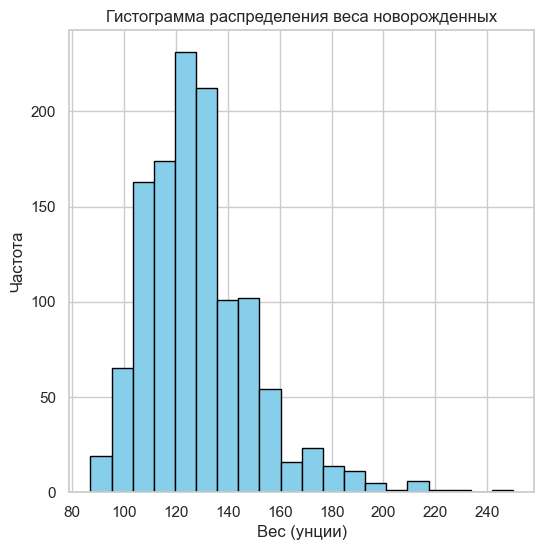

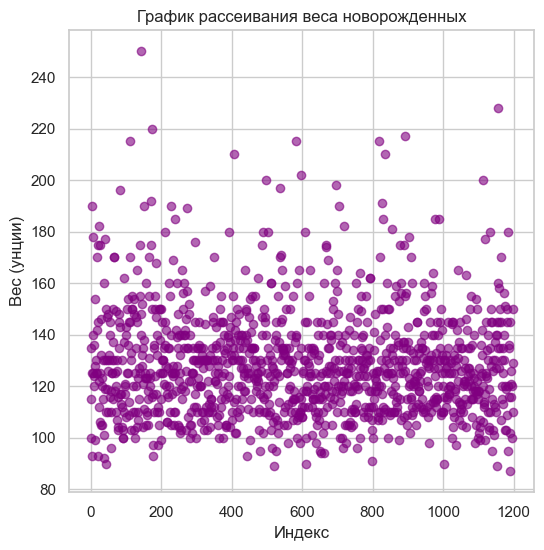

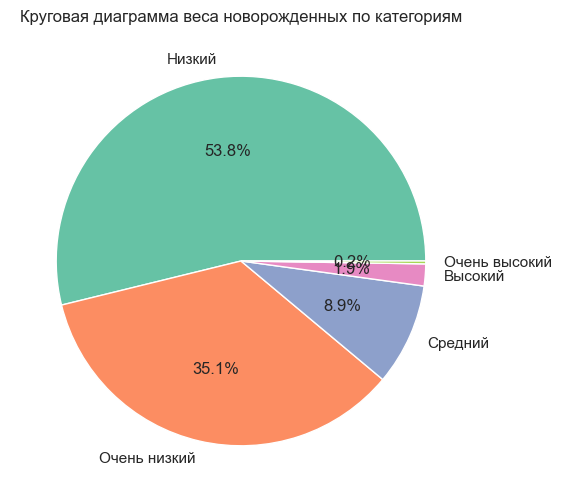

In [105]:
mode_weight = weights.mode().iloc[0]  # Мода может быть несколько, берем первое значение

print(f"Среднее значение веса: {mean_weight}")
print(f"Медиана веса: {median_weight}")
print(f"Мода веса: {mode_weight}")

# Гистограмма
plt.figure(figsize=(6, 6))
plt.hist(weights, bins=20, color="skyblue", edgecolor="black")
plt.title("Гистограмма распределения веса новорожденных")
plt.xlabel("Вес (унции)")
plt.ylabel("Частота")
plt.show()

# График рассеивания
plt.figure(figsize=(6, 6))
plt.scatter(range(len(weights)), weights, color="purple", alpha=0.6)
plt.title("График рассеивания веса новорожденных")
plt.xlabel("Индекс")
plt.ylabel("Вес (унции)")
plt.show()

# Круговая диаграмма (построим для количества новорожденных в разных весовых категориях)
weight_categories = pd.cut(
    weights, bins=5, labels=["Очень низкий", "Низкий", "Средний", "Высокий", "Очень высокий"]
)
weight_category_counts = weight_categories.value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    weight_category_counts,
    labels=weight_category_counts.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("Set2"),
)
plt.title("Круговая диаграмма веса новорожденных по категориям")
plt.show()

2. Анализ данных о заработной плате работников (источник: https://www.kaggle.com/datasets/anninasimon/employee-salary-dataset)

Чтение данных из файла csv

In [79]:
file_path = "C:/Users/bonda/OneDrive/Документы/Магистратура МАИ+СБЕР/Теор. вер. и мат. статистика/ЛР1/Employee_Salary_Dataset.csv"
data = pd.read_csv(file_path)

# Извлечение столбца с зарплатой работников
salaries = data["Salary"].dropna()  # Убираем пропуски

Визуализация распределения

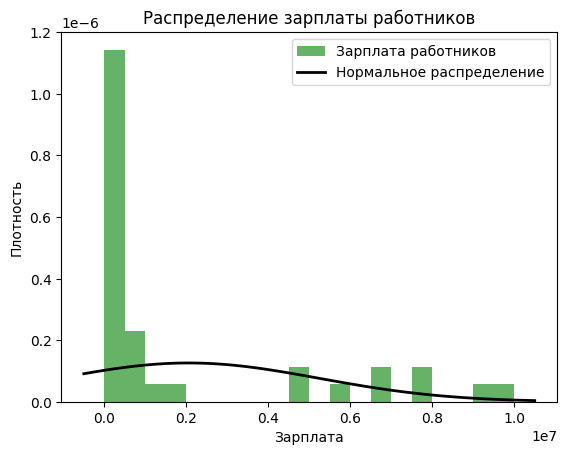

In [80]:
# Построение гистограммы
plt.hist(salaries, bins=20, density=True, alpha=0.6, color="g", label="Зарплата работников")

# Оценка параметров нормального распределения
mu, std = salaries.mean(), salaries.std()

# Создание кривой нормального распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Наложение кривой нормального распределения
plt.plot(x, p, "k", linewidth=2, label="Нормальное распределение")

# Оформление графика
plt.title("Распределение зарплаты работников")
plt.xlabel("Зарплата")
plt.ylabel("Плотность")
plt.legend()
plt.show()

Оценка смещения медианы

In [82]:
mean_salaries = salaries.mean()
median_salaries = salaries.median()
range_salaries = salaries.max() - salaries.min()  # Размах

threshold = 0.15 * range_salaries  # 15% от размаха
diff = abs(mean_salaries - median_salaries)  # Модуль разницы между средним и медианой

print(f"Среднее значение зарплаты: {mean_salaries}")
print(f"Медиана зарплаты: {median_salaries}")
print(f"Размах: {range_salaries}")
print(f"Разница между средним и медианой: {diff}")
print(f"Пороговое значение для смещённой медианы (15% размаха): {threshold}")

if diff >= threshold:
    print("Распределение имеет смещённую медиану относительно среднего на ~15% размаха.")
else:
    print("Распределение не имеет значительного смещения медианы относительно среднего.")

Среднее значение зарплаты: 2059147.142857143
Медиана зарплаты: 250000.0
Размах: 9997000
Разница между средним и медианой: 1809147.142857143
Пороговое значение для смещённой медианы (15% размаха): 1499550.0
Распределение имеет смещённую медиану относительно среднего на ~15% размаха.


Расчет описательных характеристик распределения выбранных данных

Среднее значение зарплаты: 2059147.142857143
Медиана зарплаты: 250000.0
Мода зарплаты: 25000


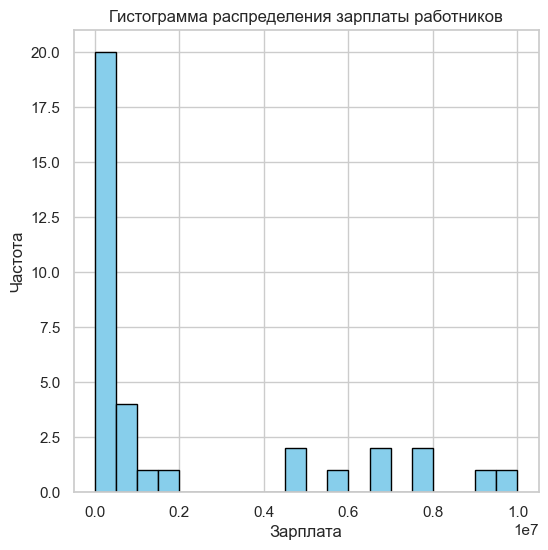

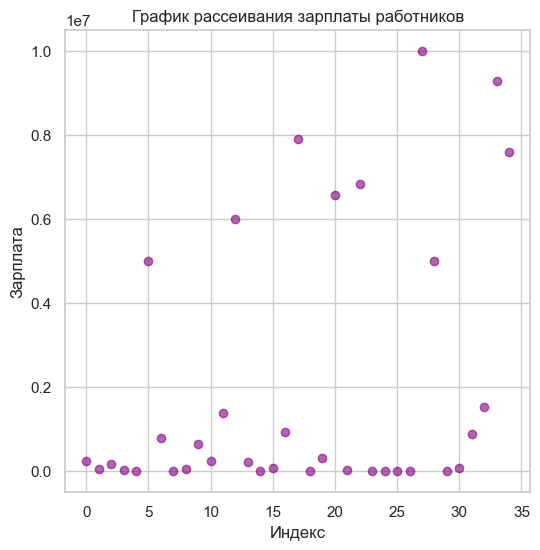

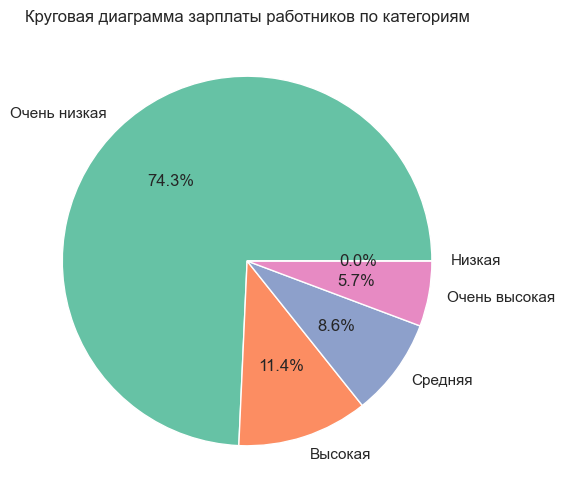

In [104]:
mode_salary = salaries.mode().iloc[0]  # Мода может быть несколько, берем первое значение

print(f"Среднее значение зарплаты: {mean_salaries}")
print(f"Медиана зарплаты: {median_salaries}")
print(f"Мода зарплаты: {mode_salary}")

# Гистограмма
plt.figure(figsize=(6, 6))
plt.hist(salaries, bins=20, color="skyblue", edgecolor="black")
plt.title("Гистограмма распределения зарплаты работников")
plt.xlabel("Зарплата")
plt.ylabel("Частота")
plt.show()

# График рассеивания
plt.figure(figsize=(6, 6))
plt.scatter(range(len(salaries)), salaries, color="purple", alpha=0.6)
plt.title("График рассеивания зарплаты работников")
plt.xlabel("Индекс")
plt.ylabel("Зарплата")
plt.show()

# Круговая диаграмма
salaries_categories = pd.cut(
    salaries, bins=5, labels=["Очень низкая", "Низкая", "Средняя", "Высокая", "Очень высокая"]
)
salaries_category_counts = salaries_categories.value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    salaries_category_counts,
    labels=salaries_category_counts.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("Set2"),
)
plt.title("Круговая диаграмма зарплаты работников по категориям")
plt.show()

3. Анализ данных о случайных числах, сгенерированных с помощью np.random.rand() (источник: https://www.kaggle.com/datasets/timoboz/random-numbers).

Чтение данных из файла csv

In [91]:
file_path = "C:/Users/bonda/OneDrive/Документы/Магистратура МАИ+СБЕР/Теор. вер. и мат. статистика/ЛР1/random_numbers_1000.csv"
data = pd.read_csv(file_path)

# Извлечение столбца с сгенерированными числами
numbers = data["number"].dropna()  # Убираем пропуски

Визуализация распределения

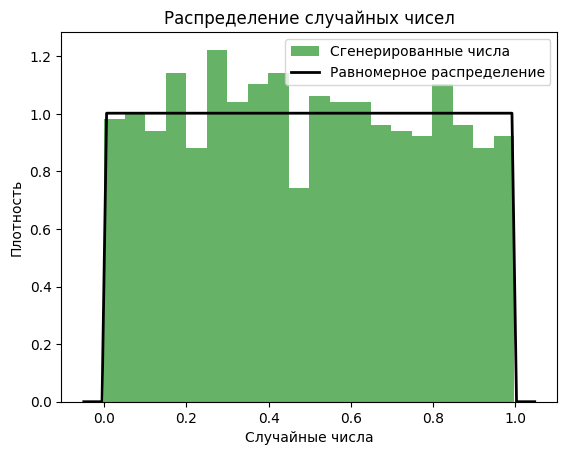

In [92]:
# Построение гистограммы
plt.hist(numbers, bins=20, density=True, alpha=0.6, color="g", label="Сгенерированные числа")

# Оценка параметров равномерного распределения
a, b = numbers.min(), numbers.max()

# Создание кривой равномерного распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = uniform.pdf(x, loc=a, scale=b - a)

# Наложение кривой равномерного распределения
plt.plot(x, p, "k", linewidth=2, label="Равномерное распределение")

# Оформление графика
plt.title("Распределение случайных чисел")
plt.xlabel("Случайные числа")
plt.ylabel("Плотность")
plt.legend()
plt.show()

Оценка смещения медианы

In [93]:
mean_numbers = numbers.mean()
median_numbers = numbers.median()
range_numbers = numbers.max() - numbers.min()  # Размах

threshold = 0.15 * range_numbers  # 15% от размаха
diff = abs(mean_numbers - median_numbers)  # Модуль разницы между средним и медианой

print(f"Среднее значение случайного числа: {mean_numbers}")
print(f"Медиана случайного числа: {median_numbers}")
print(f"Размах: {range_numbers}")
print(f"Разница между средним и медианой: {diff}")
print(f"Пороговое значение для смещённой медианы (15% размаха): {threshold}")

if diff >= threshold:
    print("Распределение имеет смещённую медиану относительно среднего на ~15% размаха.")
else:
    print("Распределение не имеет значительного смещения медианы относительно среднего.")

Среднее значение случайного числа: 0.4904628425744203
Медиана случайного числа: 0.479824508901908
Размах: 0.9975412550326201
Разница между средним и медианой: 0.010638333672512323
Пороговое значение для смещённой медианы (15% размаха): 0.14963118825489302
Распределение не имеет значительного смещения медианы относительно среднего.


Расчет описательных характеристик распределения выбранных данных

Среднее значение случайного числа: 0.4904628425744203
Медиана случайного числа: 0.479824508901908
Мода случайного числа: 6.826981312790803e-05


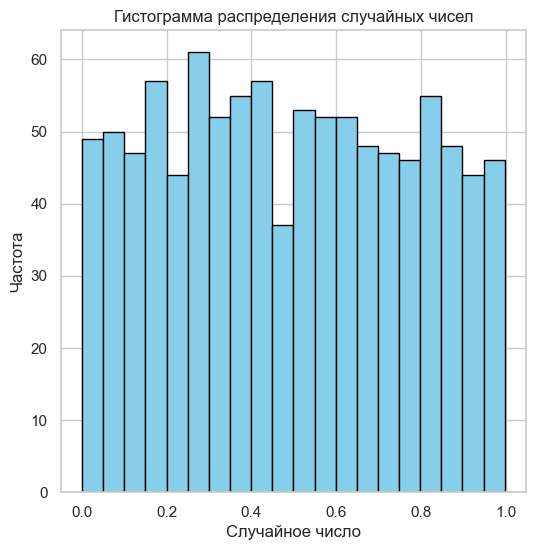

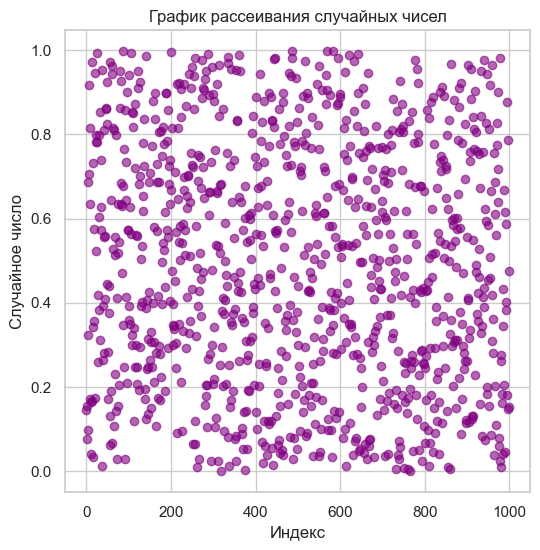

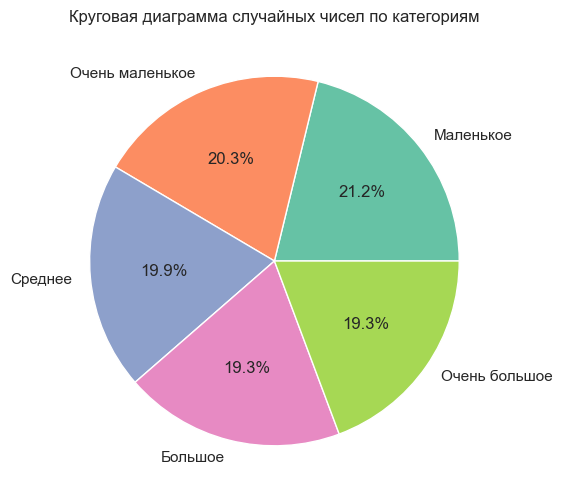

In [103]:
mode_number = numbers.mode().iloc[0]  # Мода может быть несколько, берем первое значение

print(f"Среднее значение случайного числа: {mean_numbers}")
print(f"Медиана случайного числа: {median_numbers}")
print(f"Мода случайного числа: {mode_number}")

# Гистограмма
plt.figure(figsize=(6, 6))
plt.hist(numbers, bins=20, color="skyblue", edgecolor="black")
plt.title("Гистограмма распределения случайных чисел")
plt.xlabel("Случайное число")
plt.ylabel("Частота")
plt.show()

# График рассеивания
plt.figure(figsize=(6, 6))
plt.scatter(range(len(numbers)), numbers, color="purple", alpha=0.6)
plt.title("График рассеивания случайных чисел")
plt.xlabel("Индекс")
plt.ylabel("Случайное число")
plt.show()

# Круговая диаграмма
numbers_categories = pd.cut(
    numbers, bins=5, labels=["Очень маленькое", "Маленькое", "Среднее", "Большое", "Очень большое"]
)
numbers_category_counts = numbers_categories.value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    numbers_category_counts,
    labels=numbers_category_counts.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("Set2"),
)
plt.title("Круговая диаграмма случайных чисел по категориям")
plt.show()

Часть 2.

Рассмотрим датасет с ценами жилья (источник: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

Чтение данных из файла csv

In [109]:
file_path = "C:/Users/bonda/OneDrive/Документы/Магистратура МАИ+СБЕР/Теор. вер. и мат. статистика/ЛР1/Housing.csv"
data = pd.read_csv(file_path)

# Извлечение столбца с стоимостью домов
prices = data["price"].dropna()  # Убираем пропуски

Построение боксплота

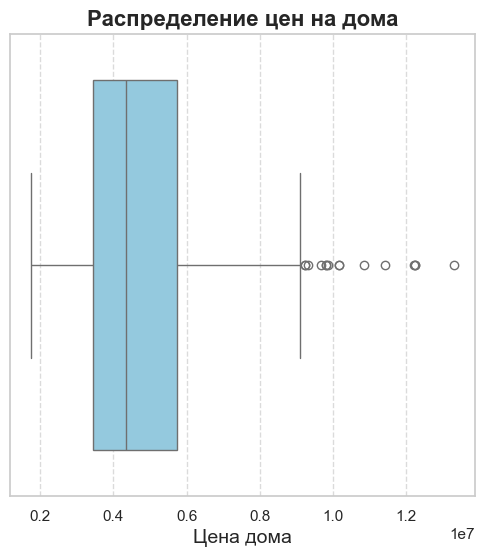

In [110]:
# Построение диаграммы размаха
sns.set_theme(style="whitegrid")

# Создание графика боксплот
plt.figure(figsize=(6, 6))
sns.boxplot(x=prices, color="skyblue")

plt.title("Распределение цен на дома", fontsize=16, fontweight='bold')
plt.xlabel("Цена дома", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Отображение графика
plt.show()

Проверка гипотез о причинах аномалий

Выявим возможные ошибки в данных

In [116]:
# Проверка на отрицательные значения
negative_prices = data[prices < 0]
if not negative_prices.empty:
    print("Найдены отрицательные значения цен:")
    print(negative_prices)
else:
    print("Отрицательные значения цен отсутствуют.")

# Проверка на нулевые значения
zero_prices = data[prices == 0]
if not zero_prices.empty:
    print("Найдены нулевые значения цен:")
    print(zero_prices)
else:
    print("Нулевые значения цен отсутствуют.")

Отрицательные значения цен отсутствуют.
Нулевые значения цен отсутствуют.


Выявим характеристики домов с аномальными ценами

In [111]:
# Выбор домов с аномальными ценами (выше 95-го процентиля)
anomalies = data[prices > prices.quantile(0.95)]

# Анализ характеристик домов с аномальными ценами
anomalies[["area", "stories", "parking"]].describe()

,area,stories,parking
count,27.000000,27.000000,27.000000
mean,7480.925926,2.296296,1.629630
std,2615.582755,0.912090,0.791695
min,3500.000000,1.000000,0.000000
25%,6000.000000,2.000000,1.000000
50%,7420.000000,2.000000,2.000000
75%,8300.000000,2.000000,2.000000
max,16200.000000,4.000000,3.000000


Оценим зависимость стоимости домов от их площади

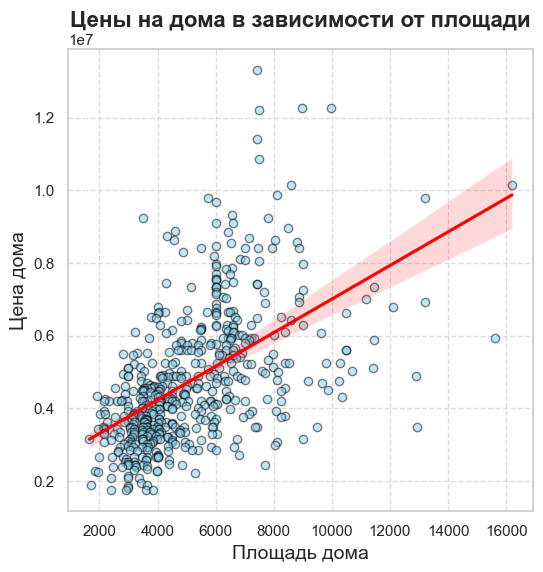

In [114]:
# Площадь дома
area_feature = data["area"]

# Настройка стиля графика
sns.set_theme(style="whitegrid")

# Построение диаграммы рассеяния цены дома от площади
plt.figure(figsize=(6, 6))
plt.scatter(area_feature, prices, alpha=0.5, color="skyblue", edgecolor="black")

# Добавление линии тренда
sns.regplot(x=area_feature, y=prices, scatter=False, color="red")

# Добавление заголовка и меток осей
plt.title("Цены на дома в зависимости от площади", fontsize=16, fontweight="bold")
plt.xlabel("Площадь дома", fontsize=14)
plt.ylabel("Цена дома", fontsize=14)

# Настройка сетки
plt.grid(axis="both", linestyle="--", alpha=0.7)

# Отображение графика
plt.show()

Вывод: высокой корреляции между площадью дома и его стоимостью не наблюдается. В данном датасете не хватает важных данных для поиска причин аномалий. Например, в данном случае, можно было бы рассмотреть зависимость цены от года продажи дома или количественных оценок его состояния, окружающей флоры и доступности различных инфраструктур.